In [1]:
import pandas as pd
import numpy as np
from os.path import join
import matplotlib.pyplot as plt

In [20]:
#Chargement des données
path_raw = '/Users/hermann-kevin/Desktop/PFR/data/raw_data/'
file_members = 'members.csv'
file_train = 'train.csv'

In [3]:
members = pd.read_csv(join(path_raw, file_members), error_bad_lines=False)

In [4]:
print("Nombre total de membres: {}".format(members.shape[0]) )
members.head(10)

Nombre total de membres: 34403


,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,20120703,20171006
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,NaN,4,20160326,20160329
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,0,NaN,7,20160130,20170930
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,0,NaN,7,20110111,20170930
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,0,NaN,7,20160217,20170613


In [27]:
from collections import Counter
print("*****Nombre d'utilisateurs par ville*****")

freqC = Counter(members['city'])
dfC = pd.DataFrame.from_dict(freqC, orient='index').sort_values(by=[0], ascending=False).reset_index()
dfC.columns= ['Ville', 'Nombre d\'utilisateurs']
dfC.T

*****Nombre d'utilisateurs par ville*****


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Ville,1,13,5,4,15,22,6,14,12,9,...,11,18,10,21,3,17,7,16,20,19
Nombre d'utilisateurs,19445,3395,2634,1732,1525,1467,913,708,491,309,...,285,259,216,213,204,152,93,35,27,11


#### On remarque que la majorité des utilisateurs sont issues de la ville 1. On peut donc séparer les utilisateurs en deux catégories, ceux issus de la ville 1 et ceux qui ne le sont pas

In [28]:
print("*****Age des utilisateurs par ordre décroissant*****")

freqA = Counter(members['bd'])
dfA = pd.DataFrame.from_dict(freqA, orient='index').sort_values(by=[0], ascending=False).reset_index()
dfA.columns= ['Age', 'Nombre d\'utilisateurs']
dfA.T

*****Age des utilisateurs par ordre décroissant*****


,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
Age,0,22,27,24,26,25,23,28,21,29,...,131,12,90,2,3,97,76,103,101,10
Nombre d'utilisateurs,19932,751,750,740,719,716,712,688,685,661,...,1,1,1,1,1,1,1,1,1,1


#### On remarque qu'on ne connaît pas l'age pour la majorité des utilisateurs. On a plus de la moitié des valeurs qui sont aberrantes (age<=0 et age >= 100)

*****Age des utilisateurs par ville*****


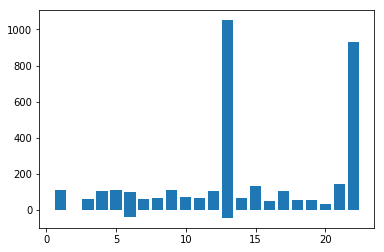

In [18]:
print("*****Age des utilisateurs par ville*****")
plt.bar(members['city'], members['bd'])
plt.show()

In [9]:
print("*****Genre des utilisateurs*****")

freqG = Counter(members['gender'])
dfG = pd.DataFrame.from_dict(freqG, orient='index').sort_values(by=[0], ascending=False).reset_index()
dfG.columns= ['Genre', 'Nombre d\'utilisateurs']
dfG

*****Genre des utilisateurs*****


,Genre,Nombre d'utilisateurs
0,NaN,19902
1,male,7405
2,female,7096


#### Comme pour le genre, on remarque qu'on ne connaît pas le genre pour 58% des utilisateurs. On a donc une majorité des utilisateurs pour lesquels il manque cette information.

*****Différents types d'enregistrement des utilisateurs*****


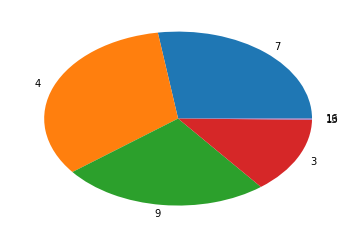

In [17]:
print("*****Différents types d'enregistrement des utilisateurs*****")
freqR = Counter(members['registered_via'])
dfR = pd.DataFrame.from_dict(freqR, orient='index').reset_index()
plt.pie(dfR[0], labels=dfR['index'])
plt.show()

### Fusion des données Train et Members

In [21]:
train = pd.read_csv(join(path_raw, file_train), error_bad_lines=False)

In [22]:
train_members = train[['msno','song_id','target']].merge(members,on='msno')

In [23]:
train_members

,msno,song_id,target,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1,1,0,NaN,7,20120102,20171005
1,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1,1,0,NaN,7,20120102,20171005
2,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1,0,NaN,7,20120102,20171005
3,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,1,1,0,NaN,7,20120102,20171005
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,XUz4Z4wPPChz+OIwkwj7HJ8teIjW3rEMdEATM80rDxM=,1,1,0,NaN,7,20120102,20171005
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,+h+uIXLQyXHuCdwAY5oT3T302vt0IdQJtux0APXhriw=,1,1,0,NaN,7,20120102,20171005
6,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,+LztcJcPEEwsikk6+K5udm06XJQMzR4+lzavKLUyE0k=,1,1,0,NaN,7,20120102,20171005
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,rdNg0FiLBStCei8h1/h2kwv8IS97ZgONQkb/kXGAvqM=,1,1,0,NaN,7,20120102,20171005
8,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,WRuHbl8CJbAuzUb4f/88Ly6IXif+IVVWolkp33Nm8wI=,1,1,0,NaN,7,20120102,20171005
9,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,NWrFxxzjzsSolyGnnLWlkRrMUIzbxhKesaJHNOp8e80=,1,1,0,NaN,7,20120102,20171005
